# Poin-poin Assignment Day 8
1. Gunakan Dataset California (california_dataset.csv)
2. Drop kolom Latitude dan Logitude
3. **Lakukan Feature Scalling Untuk Dataset California**
4. Buatlah Baseline Modelling menggunakan Lasso atau Decision Tree Regressor (Pilih 1 model saja)
5. Pilih model yang ingin di-improve dari baseline tersebut (bisa dari performa yang lebih tinggi dari model yang lainnya, atau model dengan performa yang kecil). Kemudian pilih parameter model (minimal 2 parameter model).
6. Lakukan Hyperparameter Tunning : Grid Search, Randomized Search, Bayesian Search, Optuna
7. Lihat evaluasi matrix menggunakan ROC-AUC serta tampilkan learning curve di tiap Hyperparameter tunning yang sudah dilakukan di poin 6 diatas.
8. Tulislah interpretasi kesimpulan (Conclusion) dari tiap hasil tunning (Apakah optimal, underfitting, overfitting) Jelaskan alasannya
9. Notes : import decision tree dan parameter : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
10. Notes : import Lasso dan parameter : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Import Libraries

In [ ]:
!pip install scikit-optimize
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#Import Model Machine Learning Regressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluasi Model
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import optuna

#Masukkan libraries lain jika dibutuhkan
from google.colab import files

In [ ]:
dataset = files.upload()

for fn in dataset.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(name = fn, length = len(dataset[fn])))

Saving 1699057012240-california_dataset (1).csv to 1699057012240-california_dataset (1).csv
Nama file "1699057012240-california_dataset (1).csv" dengan panjang 1915795 bytes


In [ ]:
df = pd.read_csv('1699057012240-california_dataset (1).csv')

In [ ]:
len(df)

20640

In [ ]:
len(df) - len(df.drop_duplicates())

0

In [ ]:
len(df.drop_duplicates())

20640

In [ ]:
len(df.drop_duplicates()) / len(df)

1.0

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
house_price    0
dtype: int64

In [ ]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True) #drop latitude dan longtude
X = df.drop('house_price', axis=1)
y = df['house_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(20640, 6)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

## Baseline

In [ ]:
lasso_model = Lasso() #Lasso
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#prediksi memakai lasso di train
y_train_pred_lasso = lasso_model.predict(X_train)

#RMSE Lasso
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))

#Prediksi memakai lasso di test
y_pred_lasso = lasso_model.predict(X_test)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("RMSE on Training Data (Lasso):", rmse_train_lasso)
print("RMSE on Testing Data (Lasso):", rmse_test_lasso)

RMSE on Training Data (Lasso): 1.1561912522543263
RMSE on Testing Data (Lasso): 1.1448563543099792


In [ ]:
#prediksi memakai DTR di train
y_train_pred_dtr = dtr_model.predict(X_train)

#RMSE DTR
rmse_train_dtr = np.sqrt(mean_squared_error(y_train, y_train_pred_dtr))

#Prediksi memakai DTR di test
y_pred_dtr = dtr_model.predict(X_test)

rmse_test_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

print("RMSE on Training Data (DTR):", rmse_train_dtr)
print("RMSE on Testing Data (DTR):", rmse_test_dtr)

RMSE on Training Data (DTR): 2.754391223471454e-16
RMSE on Testing Data (DTR): 1.2680543517602738


### Conclusion Baseline

Dilakukan evaluasi menggunakan RMSE, hal ini dikarenakan menggunakan model regresi, sehingga tidak bisa menggunakan evaluasi ROC AUC, atau mungkin perlu penyesuaian lagi. sesuai instruksi nomor 7.

Berdasarkan hasil, terlihat bahwa model Lasso memiliki RMSE pada data pelatihan (1.1561912522543263) dan data pengujian (1.1448563543099792) adalah hampir sama. Ini menunjukkan bahwa model memiliki kinerja yang konsisten antara data pelatihan dan pengujian, yang merupakan indikasi bahwa model tidak overfitting atau underfitting atau bisa dibilang sudah optimal.

Sedangkan model Decision Tree Regressor (DTR) memiliki Root Mean Square Error (RMSE) yang sangat kecil pada data pelatihan, hampir mendekati nol (2.754391223471454e-16). Ini menunjukkan bahwa model dapat memprediksi data pelatihan dengan sangat akurat. Namun, RMSE pada data pengujian cukup tinggi (1.2680543517602738) dibandingkan dengan data pelatihan. Ini menunjukkan bahwa model mungkin overfitting.

Oleh sebab itu akan dilakukan parameter tuning untuk model DTR, untuk dilihat apakah performa bisa naik atau tidak.

## GridSearch

In [ ]:
param_grid = {'splitter':['best','random'],
            'max_depth' : [1,3,5,7,9,11,12],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
           'max_features':['auto','log2','sqrt',None],
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90] }

# Inisialisasi GridSearchCV
dtr_model = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Lakukan fitting dan cari parameter terbaik
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print(grid_search.best_params_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
best_params = grid_search.best_params_
print("Parameter Terbaik:", best_params)

Parameter Terbaik: {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [ ]:
best_params = grid_search.best_params_
dtr_grid_best = DecisionTreeRegressor(**best_params)
dtr_grid_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=30,
                      min_samples_leaf=4, min_weight_fraction_leaf=0.1)

In [ ]:
# Predict the target values for the training and testing data
y_train_dtr_pred = dtr_grid_best.predict(X_train)
y_test_dtr_pred = dtr_grid_best.predict(X_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_dtr_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_dtr_pred))

print("RMSE on training set:", rmse_train)
print("RMSE on testing set:", rmse_test)

RMSE on training set: 0.8019448700212967
RMSE on testing set: 0.8456693557494562


### Conclusion GridSearch

Berdasarkan hasil, terlihat RMSE training set: 0.8019448700212967, dan RMSE testing set: 0.8456693557494562, Perbedaan antara RMSE pada data pelatihan dan pengujian tidak terlalu besar, yang menunjukkan bahwa model tidak overfitting atau underfitting. Ini adalah indikasi bahwa model Anda mampu memprediksi data yang belum pernah dilihat sebelumnya (data pengujian) dengan akurasi yang hampir sama dengan data pelatihan. sehingga dapat disimpulkan model mengalami peningkatan dari model baseline yang overfitting.

## RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter yang akan diuji
param_dist = {'splitter':['best','random'],
            'max_depth' : [1,3,5,7,9,11,12],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
           'max_features':['auto','log2','sqrt',None],
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90] }

# Inisialisasi model DTR
dtr_model = DecisionTreeRegressor()

# Inisialisasi objek RandomizedSearchCV
dtr_random_search = RandomizedSearchCV(dtr_model, param_distributions=param_dist, cv=5, scoring='neg_mean_squared_error', n_iter=10)

# Lakukan pencarian parameter terbaik
dtr_random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [ ]:
# Tampilkan parameter terbaik
best_params = dtr_random_search.best_params_
print("Parameter Terbaik:", best_params)

Parameter Terbaik: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 10, 'max_leaf_nodes': 90, 'max_features': 'auto', 'max_depth': 11}


In [ ]:
# Get the best hyperparameters and retrain the model
best_params = dtr_random_search.best_params_
dtr_random_best = DecisionTreeRegressor(**best_params)
dtr_random_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=90,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

In [ ]:
# Predict the target values for the training and testing data
y_train_dtr_random = dtr_random_best.predict(X_train)
y_test_dtr_random = dtr_random_best.predict(X_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_dtr_random))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_dtr_random))

print("RMSE on training set:", rmse_train)
print("RMSE on testing set:", rmse_test)

RMSE on training set: 0.8019448700212967
RMSE on testing set: 0.8456693557494567


### Conclusion RandomizedSearch

Hampir sama dengan GridSearch, Perbedaan antara RMSE pada data pelatihan dan pengujian tidak terlalu besar, yang menunjukkan bahwa model tidak overfitting atau underfitting. Ini adalah indikasi bahwa model Anda mampu memprediksi data yang belum pernah dilihat sebelumnya (data pengujian) dengan akurasi yang hampir sama dengan data pelatihan.

## BayesianSearch

In [ ]:
# Set up the model
dtr = DecisionTreeRegressor()

# Define the hyperparameter space
param_grid_dtr = {'splitter':['best','random'],
            'max_depth' : [1,3,5,7,9,11,12],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4,0.5],
           'max_features':['auto','log2','sqrt',None],
           'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90] }

# Set up the BayesSearchCV
dtr_bayessearch = BayesSearchCV(
    estimator=dtr,
    search_spaces=param_grid_dtr,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=50,
    random_state=10,
    n_jobs=4,
    refit=True
)

# Find the best hyperparameters
dtr_bayessearch.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dtr = dtr_bayessearch.best_params_
print("Best Hyperparameters for dtr:", best_params_dtr)

Best Hyperparameters for dtr: OrderedDict([('max_depth', 12), ('max_features', None), ('max_leaf_nodes', 50), ('min_samples_leaf', 2), ('min_weight_fraction_leaf', 0.1), ('splitter', 'best')])


In [ ]:
best_params = dtr_bayessearch.best_params_
dtr_best_bayes = DecisionTreeRegressor(**best_params)
dtr_best_bayes.fit(X_train, y_train)

# Predict the target values for the training and testing data
y_train_dtr = dtr_best_bayes.predict(X_train)
y_test_dtr = dtr_best_bayes.predict(X_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_dtr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_dtr))

print("RMSE on training set:", rmse_train)
print("RMSE on testing set:", rmse_test)

RMSE on training set: 0.8019448700212967
RMSE on testing set: 0.8456693557494563


### Conclusion BayesianSearch

Hampir sama dengans sebelumnya, Perbedaan antara RMSE pada data pelatihan dan pengujian tidak terlalu besar, yang menunjukkan bahwa model tidak overfitting atau underfitting. Ini adalah indikasi bahwa model Anda mampu memprediksi data yang belum pernah dilihat sebelumnya (data pengujian) dengan akurasi yang hampir sama dengan data pelatihan.

## Optuna

In [ ]:
def objective(trial):
  params = {
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 12),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.1, 0.5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'log2', 'sqrt', None]),
        'max_leaf_nodes': trial.suggest_categorical('max_leaf_nodes', [None, 10, 20, 30, 40, 50, 60, 70, 80, 90])
    }
  dtr_optuna = DecisionTreeRegressor(**params)
  dtr_optuna.fit(X_train, y_train)
  y_pred = dtr_optuna.predict(X_test)
    # Menghitung skor validasi silang
  score = mean_squared_error(y_test, y_pred)

  return score

# Membuat studi Optuna dan menjalankan optimasi
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Menampilkan parameter terbaik
print(study.best_params)

[I 2023-11-11 03:32:03,354] A new study created in memory with name: no-name-eadc8431-5b9f-48b6-b8b9-79bfaa891ee9
[I 2023-11-11 03:32:03,365] Trial 0 finished with value: 1.3106960720039356 and parameters: {'splitter': 'random', 'max_depth': 7, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.38584986558517287, 'max_features': None, 'max_leaf_nodes': 10}. Best is trial 0 with value: 1.3106960720039356.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
[I 2023-11-11 03:32:03,372] Trial 1 finished with value: 1.3106960720039356 and parameters: {'splitter': 'random', 'max_depth': 4, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.22955676233116137, 'max_features': 'auto', 'max_leaf_nodes': 90}. Best is trial 0 with value: 1.3106960720039356.
/usr/local/lib/python3.10/dist-packages/sklearn/t

{'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.18767595645221022, 'max_features': 'auto', 'max_leaf_nodes': 20}


In [ ]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")

Best Parameters: {'splitter': 'best', 'max_depth': 5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.18767595645221022, 'max_features': 'auto', 'max_leaf_nodes': 20}
Best Mean Squared Error: 0.767761920788124


In [ ]:
dtr_best_optuna = DecisionTreeRegressor(**best_params)
dtr_best_optuna.fit(X_train, y_train)

# Predict the target values for the training and testing data
y_train_dtr_optuna = dtr_best_optuna.predict(X_train)
y_test_dtr_optuna = dtr_best_optuna.predict(X_test)

# Calculate RMSE for training and testing data
rmse_train_optuna = np.sqrt(mean_squared_error(y_train, y_train_dtr_optuna))
rmse_test_optuna = np.sqrt(mean_squared_error(y_test, y_test_dtr_optuna))

print("RMSE on training set (Optuna):", rmse_train_optuna)
print("RMSE on testing set (Optuna):", rmse_test_optuna)

RMSE on training set (Optuna): 0.8627841039127208
RMSE on testing set (Optuna): 0.8762202467348736


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


### Conclusion Optuna

Hampir sama dengan sebelumnya, Perbedaan antara RMSE pada data pelatihan dan pengujian tidak terlalu besar, yang menunjukkan bahwa model tidak overfitting atau underfitting. Ini adalah indikasi bahwa model Anda mampu memprediksi data yang belum pernah dilihat sebelumnya (data pengujian) dengan akurasi yang hampir sama dengan data pelatihan.

## Plot

In [ ]:
def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("neg_mean_squared_error")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training RMSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing RMSE")

    plt.legend(loc="best")
    plt.show()

### Plot Learning Curve Baseline

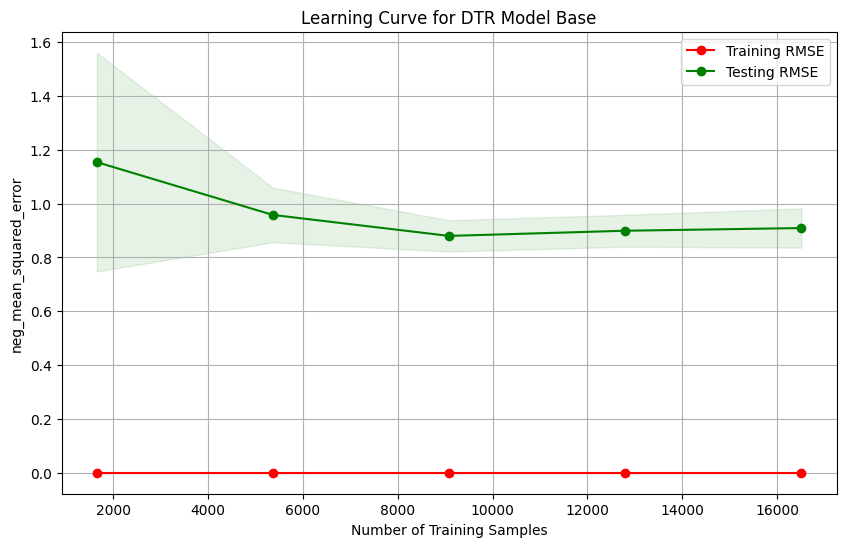

In [ ]:
plot_learning_curve(dtr_model, X, y, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for DTR Model Base")

### Plot Learning Curve DTR Grid

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

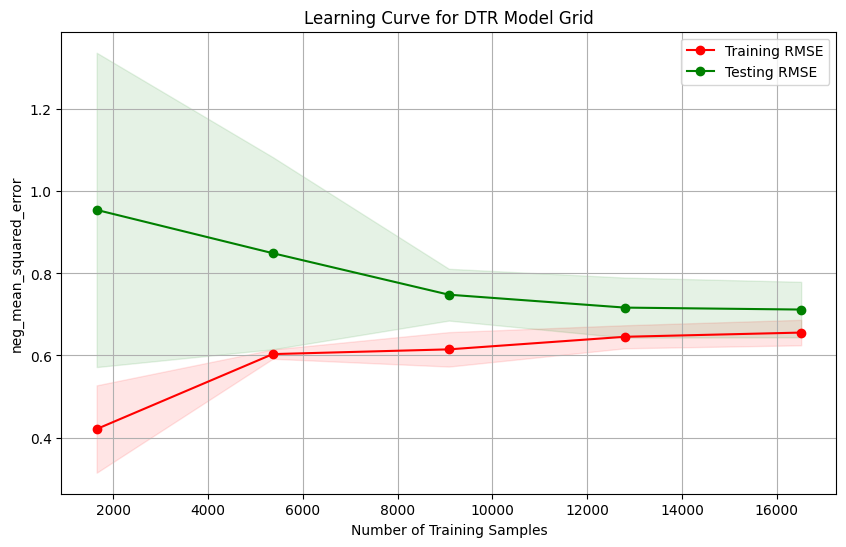

In [ ]:
plot_learning_curve(dtr_grid_best, X, y, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for DTR Model Grid")

### Plot Learning Curve DTR Random

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

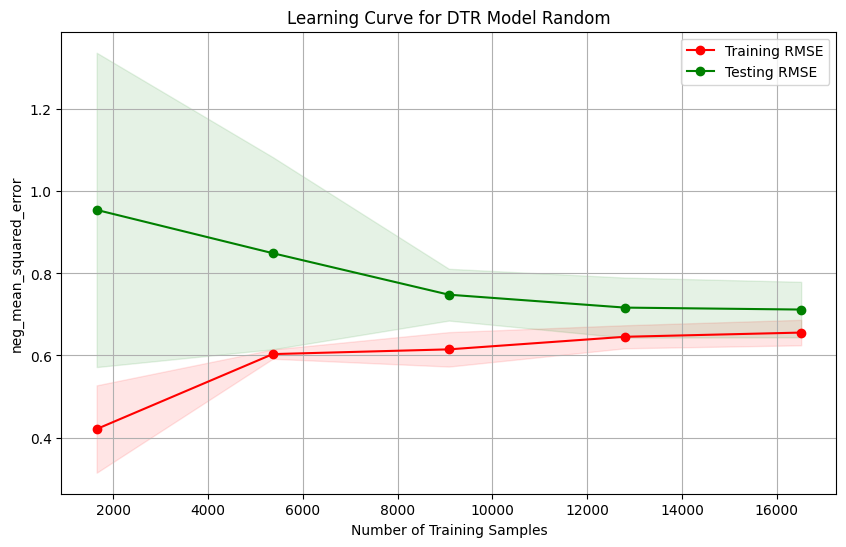

In [ ]:
plot_learning_curve(dtr_random_best, X, y, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for DTR Model Random")

### Plot Learning Curve DTR Bayes

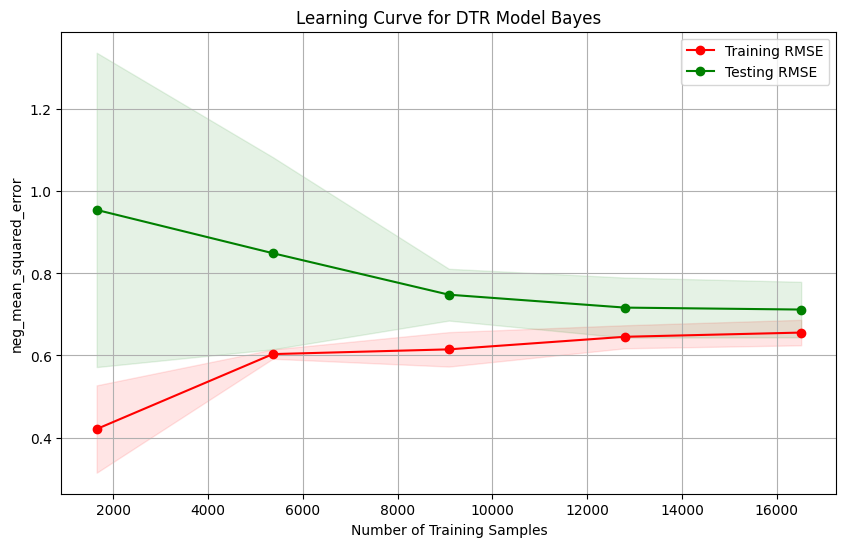

In [ ]:
plot_learning_curve(dtr_best_bayes, X, y, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for DTR Model Bayes")

### Plot Learning Curve Optuna

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

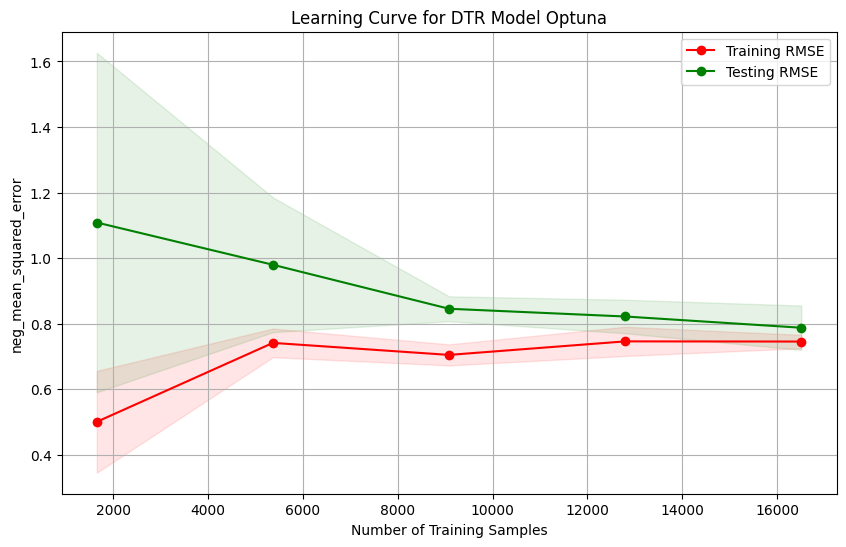

In [ ]:
plot_learning_curve(dtr_best_optuna, X, y, cv=5, scoring='neg_mean_squared_error', title="Learning Curve for DTR Model Optuna")

## Conclusion

Berdasarkan hasil yang telah dikerjakan, terlihat bahwa model Decision Tree Regressor yang awalnya overfitting setelah dituning berubah menjadi optimal, tidak overfit maupun underfit. lalu berdasarkan hasil RMSE dan plot learning curve, memiliki hasil:

* Grid Search: 0.8456693557494562
* Random Search: 0.8456693557494567
* Bayesian Search: 0.8456693557494563
* Optuna: 0.8762202467348736

Dapat disimpulkan bahwa Grid Search, Random Search, dan Bayesian Search memberikan hasil yang hampir sama dan lebih baik dibandingkan dengan Optuna, karena mereka memiliki nilai RMSE yang lebih rendah pada data pengujian. Namun, perbedaannya sangat kecil sehingga mungkin tidak signifikan dalam praktiknya. dan dari learning curve, terlihat bahwa pada plotnya metode Grid, Random, dan Bayesian memiliki plot yang terus naik konsisten untuk mencapai konvergensi, berbeda dengan optuna yang kondisi keduanya lebih rendah dibanding 3 metode tadi, serta tidak konsisten naik karena ada turunnya.


